<a href="https://colab.research.google.com/github/VincentPetitPro/M1-ML-assignements/blob/master/ML_Hands_on_2_Pima_Indians_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hands-on 2 - Diabetes diagnosis

The Pima Indian Diabetes dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

See https://www.kaggle.com/kumargh/pimaindiansdiabetescsv , https://data.world/data-society/pima-indians-diabetes-database or https://www.kaggle.com/uciml/pima-indians-diabetes-database for a description of the data.

In [1]:
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv

--2022-04-12 12:34:02--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23278 (23K) [text/plain]
Saving to: ‘pima-indians-diabetes.data.csv’

pima-indians-diabet 100%[===================>]  22.73K  --.-KB/s    in 0s      

2022-04-12 12:34:02 (84.1 MB/s) - ‘pima-indians-diabetes.data.csv’ saved [23278/23278]



# Question 1
Load the file pima-indians-diabetes.data.csv into a Pandas dataframe, and name its columns ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

This should return a Dataframe of shape 768 rows x 9 columns

In [264]:
import pandas as pd
def q1():
  col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
  pima = pd.read_csv(r"pima-indians-diabetes.data.csv", header = None, names = col_names)
  return pima

pima = q1()
assert pima.shape == (768, 9)
assert type(pima) == pd.DataFrame


#Question 2

Split the DataFrame into `X` (the data) and `y` (the labels). Ignore the column 'skin', ie. don't put it into X.

* `X`* must be a pandas DataFrame of shape* `(768, 7)`
* `y`* must be a pandas Series of shape* `(768,)`.

In [265]:
def q2():
  cleaned_df = pima.loc[:]
  cleaned_df = cleaned_df.drop('skin', 1)
  cleaned_df = cleaned_df.drop('label', 1)
  X = cleaned_df.loc[:]
  y = pima.loc[:, 'label']
  return (X,y), cleaned_df

(X,y), cleaned_df = q2()
assert type(X) == pd.DataFrame
assert X.shape == (768, 7)
assert type(y) == pd.Series
assert y.shape == (768,)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


# Question 3
Using `train_test_split`, split `X` and `y` into training and test sets `(X_train, X_test, y_train, and y_test)`, where the size of the test set is 30% the size of the total dataset.
*This function should return a tuple of length 4:* `(X_train, X_test, y_train, y_test)`*, where* 
* `X_train` *has shape* `(537, 7)`
* `X_test` *has shape* `(231, 7)`
* `y_train` *has shape* `(537,)`
* `y_test` *has shape* `(231,)`

In [266]:

from sklearn.model_selection import train_test_split
def q3():
  return train_test_split(X,y,train_size=537,test_size=231,random_state=0)

X_train, X_test, y_train, y_test = q3()
assert X_train.shape == (537, 7)
assert X_test.shape == (231, 7)
assert y_train.shape == (537,)
assert y_test.shape == (231,)

# Question 4
Train a decision tree classifier on the training set

In [267]:

from sklearn.tree import DecisionTreeClassifier
def q4(mdepth):
  model = DecisionTreeClassifier(max_depth=mdepth)
  model.fit(X_train, y_train)
  return model

model = q4(None)
assert type(model) == DecisionTreeClassifier

# Question 5
Using your classifier, run predictions on the test set

In [268]:
def q5():
  return model.predict(X_test)

y_predict = q5()

# Question 6
Compute the accuracy of the predictions on the test set

In [269]:
from sklearn.metrics import accuracy_score
def q6(test_data):
  return accuracy_score(test_data, y_predict)
model_accuracy_score = q6(y_test)
print(model_accuracy_score)

0.7272727272727273


# Question 7
Compute the accuracy of the predictions on the training set

Are we:
- overfitting ?
- underfitting ?
- none of them ?

It is overfitting.

In [270]:
print(accuracy_score(y_train, model.predict(X_train)))

1.0


# Question 8
Plot the decision tree classifier

In [249]:
!wget http://www.eyrignoux.com.fr/coursIA/machineLearning/adspy_shared_utilities.py -O adspy_shared_utilities.py

--2022-04-12 16:06:51--  http://www.eyrignoux.com.fr/coursIA/machineLearning/adspy_shared_utilities.py
Resolving www.eyrignoux.com.fr (www.eyrignoux.com.fr)... 62.210.16.62
Connecting to www.eyrignoux.com.fr (www.eyrignoux.com.fr)|62.210.16.62|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.eyrignoux.com.fr/coursIA/machineLearning/adspy_shared_utilities.py [following]
--2022-04-12 16:06:51--  https://www.eyrignoux.com.fr/coursIA/machineLearning/adspy_shared_utilities.py
Connecting to www.eyrignoux.com.fr (www.eyrignoux.com.fr)|62.210.16.62|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9981 (9.7K) [text/x-python]
Saving to: ‘adspy_shared_utilities.py’

adspy_shared_utilit 100%[===================>]   9.75K  --.-KB/s    in 0s      

2022-04-12 16:06:51 (161 MB/s) - ‘adspy_shared_utilities.py’ saved [9981/9981]



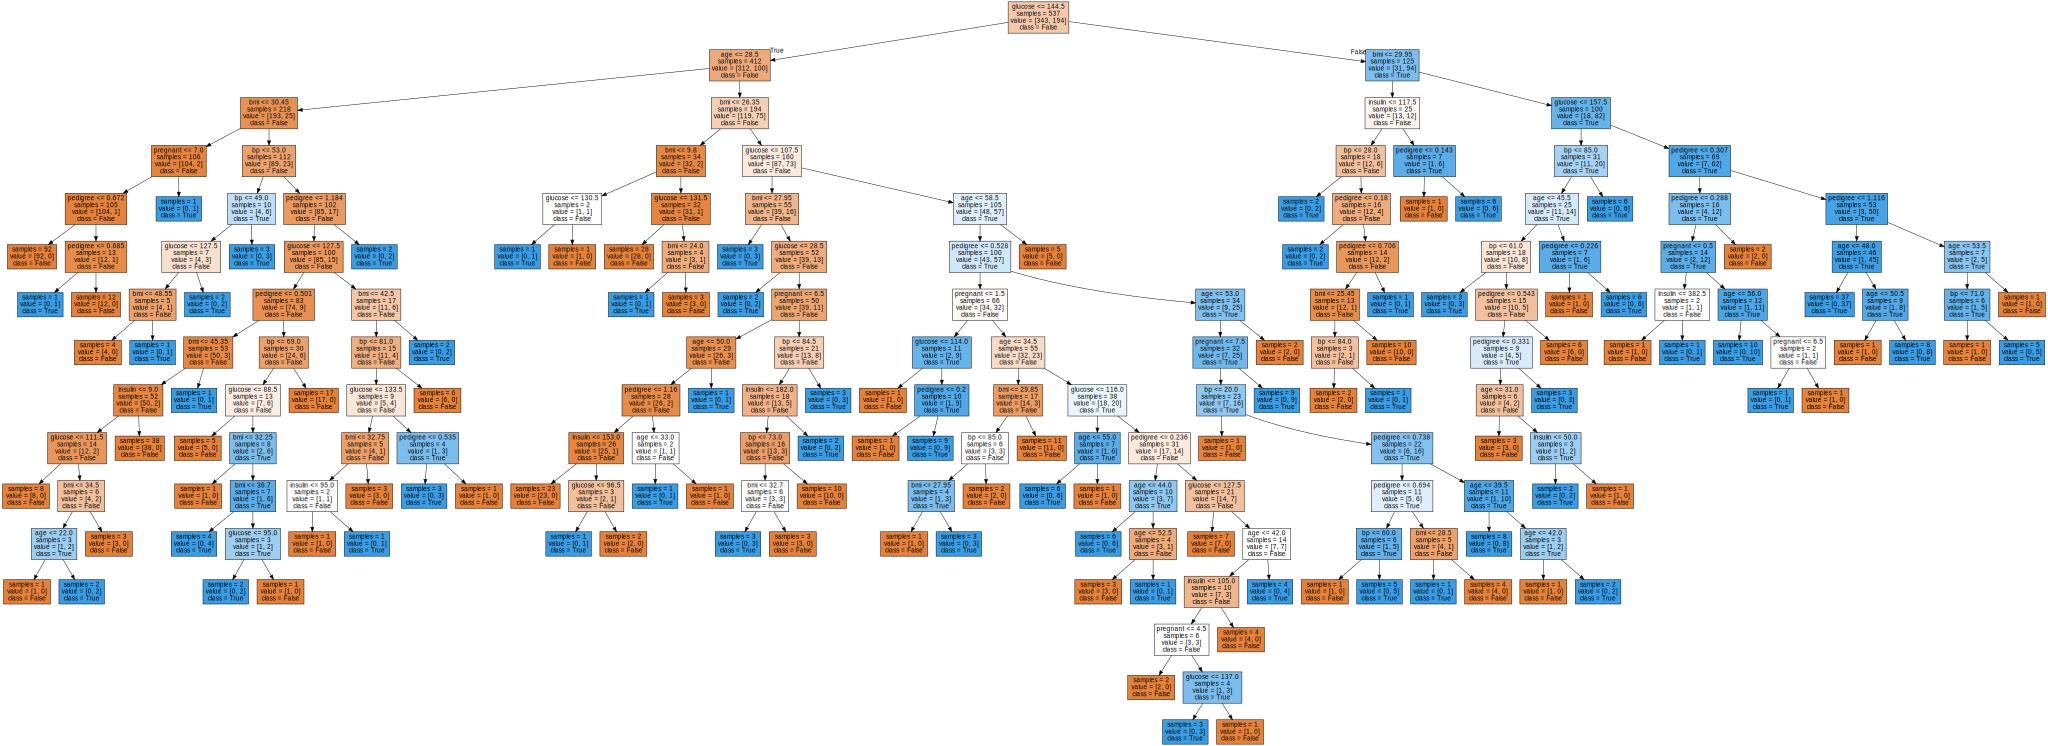

In [294]:
from adspy_shared_utilities import plot_decision_tree
def q8():
  return plot_decision_tree(model, cleaned_df.columns, ['False', 'True'])
q8()

# Question 9
Compute the accuracy on the test and on the training set for several values of max_depth


In [272]:
# Max depth of 1
model = q4(1)
y_predict = q5()
model_accuracy_score = q6(y_test)
print('Max depth of 1:',model_accuracy_score)

# Max depth of 3
model = q4(3)
y_predict = q5()
model_accuracy_score = q6(y_test)
print('Max depth of 3:',model_accuracy_score)

# Max depth of 5
model = q4(5)
y_predict = q5()
model_accuracy_score = q6(y_test)
print('Max depth of 5:',model_accuracy_score)

# Max depth of 7
model = q4(7)
y_predict = q5()
model_accuracy_score = q6(y_test)
print('Max depth of 7:',model_accuracy_score)

# Max depth of 10
model = q4(10)
y_predict = q5()
model_accuracy_score = q6(y_test)
print('Max depth of 10:',model_accuracy_score)

# Fully expanded tree
model = q4(None)
y_predict = q5()
model_accuracy_score = q6(y_test)
print('Fully expanded tree:', model_accuracy_score)
print('Model max depth', model.tree_.max_depth)

Max depth of 1: 0.7316017316017316
Max depth of 3: 0.7272727272727273
Max depth of 5: 0.7619047619047619
Max depth of 7: 0.7489177489177489
Max depth of 10: 0.7402597402597403
Fully expanded tree: 0.7532467532467533
Model max depth 15


#Question 10
Draw a scatter plot showing the accuracy on the training set, and the accuracy on the test set, by max-depth value.

Deduce from the graph the best value for max_depth.

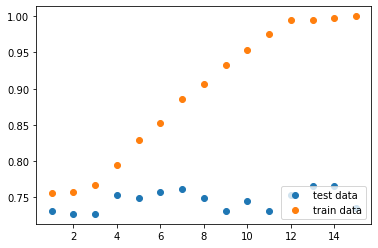

In [293]:
import matplotlib.pyplot as plt

# in the code below:
# - depths is the list of the values of max_depth that you tried. For example [1, 2, 3, ..., 15]
# - accuracies_test is the list of the corresponding accuracies on the test set
# - accuracies_train is the list of the corresponding accuracies on the training set

depths = []
accuracy_test = 0.0
accuracies_test = []
accuracy_train = 0.0
accuracies_train = []

for i in range(1, 16):
  depths.append(i)
  model = q4(i)
  y_predict = q5()
  accuracy_test = q6(y_test)
  accuracies_test.append(accuracy_test)
  accuracy_train = accuracy_score(y_train, model.predict(X_train))
  accuracies_train.append(accuracy_train)
  


plt.figure()
plt.scatter(depths, accuracies_test, label='test data')
plt.scatter(depths, accuracies_train, label='train data')
plt.legend(loc=4)
plt.show()

# Question 11
As you can see in the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), the class DecisionTreeClassifier has many other parameters which might improve the results, such as min_samples_leaf.

Try to find the best value for min_samples_leaf

Again, you must avoid to overfit and underfit your dataset.

Again, a graph showing the evolution of the accuracy by min_samples_leaf should help.

In [ ]:
for min_samples in range(1, 20):
  model2 = DecisionTreeClassifier(max_depth=10, min_samples_leaf=min_samples)
  


In [ ]:
plt.figure()
plt.scatter(mins_samples_leaf, accuracies_test, label='test data')
plt.scatter(mins_samples_leaf, accuracies_train, label='train data')
plt.legend(loc=4)
plt.show()

#Question 12
Compute the importance of the features for the best value of min_samples_leaf

What are the most important features ?

What can we do with the least important ones ?

In [ ]:
clf2 = DecisionTreeClassifier(min_samples_leaf = ???).fit(X_train, y_train)
y_pred = clf2.predict(X_test)
accuracy_score(y_test,y_pred)

In [ ]:
from adspy_shared_utilities import plot_feature_importances


## Question 13
Decision trees are prone to overfitting. As seen in class, a better alternative is a [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

Same questions as above: train random forests with different parameter values, and try to get the best possible accuracy on the test set.

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:

plt.figure()
plt.scatter(depths, accuracies_test, label='test data')
plt.scatter(depths, accuracies_train, label='train data')
plt.legend(loc=4)
plt.show()